# Grafy a vizualizace

Standardní knihovna pro tvorbu grafů je [matplotlib](https://matplotlib.org/).

**Výhody**:
- vysoká kvalita grafů, tisková kvalita
- částečná interaktivita grafů (s problémy)
- velké množství příkladů
- free software

**Nevýhody**:
- neobjektový přístup, "globální proměnné"
- roztříštěné rozhraní
- pouze 2d, 3d grafy jen v omezané podobě

V mnoha ohledech lepší, ale částečně placená knihovna [Plotly](https://plot.ly/python/line-and-scatter/).

**Výhody**:
- vysoká kvalita grafů, ale spíše pro online publikaci
- lepší interaktivita grafů
- objektový přístup, přehledný návrh
- možnost provázání s cloudovou službou 
- skutečné 3d grafy

**Nevýhody**:
- menší rozšíření, méně příkladů
- nutnost prohlížeče pro vizualizaci, omezené možnosti offline zpracování
- komerční produkt
- ukládání do vektorových formátů (PDF, SVG, EPS) pouze v placené verzi



## Matplotlib
Zdroje:

- [Anatomy of Matplotlib](http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/tree/master/) ... výborný tutoriál a přehled nejpoužívanějších funkce
- [Oficiální tutoriály](https://matplotlib.org/tutorials/index.html) pro různé typy grafů na stránkách Matplotlib.

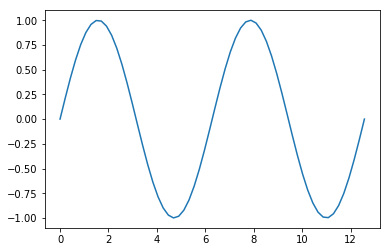

In [12]:
# Simple plot
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.0, 4*np.pi, 60)
y = np.sin(x)
plt.plot(x, y)
plt.show()


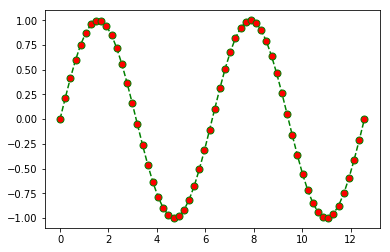

In [16]:
# Plot style
plt.plot(x, y, color='green', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=7)
plt.show()

[Nastavení stylů čar a bodů](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)... platí pro příkaz `plot` a další podobné příkazy.

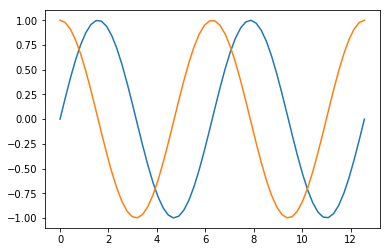

In [19]:
# More graphs in single plot

y1 = np.sin(x)
y2 = np.sin(x + np.pi/2)
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

## Figure, Axes, Subplots ...

Výstup z matplotlib je 'obrázek' (`Figure`), obrázek se skládá z 'os' (`Axes`) což jsou vlastně jednotlivá okénka grafů, která je možno skládat vedle sebe (nebo i přes sebe). Dosavadní příklady používaly implicitní Figure a implicitní Axes modulu `pyplot`. To je výhodné pro jednoduché grafy, ale nevhodné pro cokoliv složitějšího. Velmi pěkně je to vysvětleno
v [Anatomy of Matplotlib - Figures ...](http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part1-Figures_Subplots_and_layouts.ipynb)

Předchozí příklad doplněný o popisky a další prvky lze provést také takto:


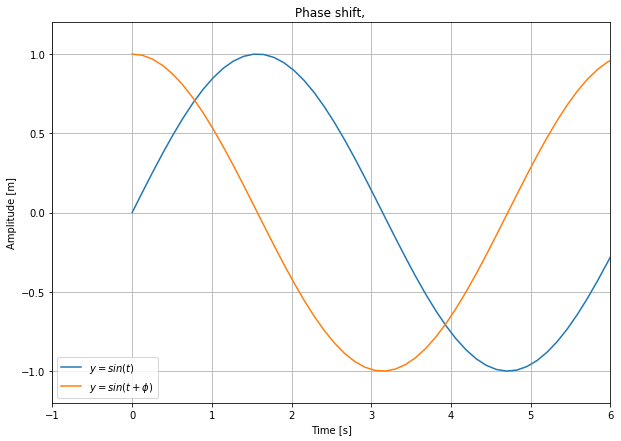

In [25]:
# Titles, legend, ...

# Figure size (must be set before plotting)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

x = np.linspace(0.0, 4*np.pi, 100)
y1 = np.sin(x)
y2 = np.sin(x + np.pi/2)

# Legend labels, using TeX
ax.plot(x,y1, label='$y = sin( t )$')
ax.plot(x,y2, label='$y = sin( t + \phi)$')

# Limits
ax.set_xlim([-1, 6])
ax.set_ylim([-1.2, 1.2])
# Or plt.axis([-1, 6, -1.2, 1.2])

# Axis labels, title
ax.set_ylabel('Amplitude [m]')
ax.set_xlabel('Time [s]')
# Using TeX in titles
ax.set_title('Phase shift, ')

# Legend
ax.legend()

# Grid on
ax.grid()


plt.show()


### Grafy v tiskové kvalitě
Je obvykle nutné sladit font a použít stejné značení. Použití TeXu v grafech je nutností.
Další nastavení je popsáno [zde](https://matplotlib.org/users/usetex.html#usetex-tutorial).

Dále je nutné uložit graf ve vektorovém formátu (např. pdf):

In [34]:
# saving to file

from matplotlib.backends.backend_pdf import PdfPages


# save into PDF
# Using `with` force closing the output file.
with PdfPages('foo.pdf') as pp:
    pp.savefig(fig)
    
# save as PNG goes other way
fig.savefig('foo.png')
    


## Animation with Matplotlib

Modul `matplotlib.animation` umožňuje tvorbu jednoduchých animovaných grafů. Pro zobrazení v Jupiter notebooku je třeba 
import `HTML` a zobrazení pomocí html5.

In [36]:
import matplotlib.animation as animation
from IPython.display import HTML


# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))
ax.grid()

# Plot object that we want to animate
line, = ax.plot([], [], lw=2)



# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)



# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)


anim = animation.FuncAnimation(fig, animate, blit=False, interval=10,
                               init_func=init)

# For embedding into Jupiter notebook.
HTML(anim.to_html5_video())

#
# 

